In [14]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-11-2022)' )

loaded gammapy version: 1.1.dev320+g92a6eb9f4 
Supposed to be 1.0 (21-11-2022)


In [15]:
#get_ipython().system('jupyter nbconvert --to script 1-Nui_Par_Fitting.ipynb')
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets#, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    PowerLawNuisanceSpectralModel,
    PowerLawNormNuisanceSpectralModel
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys

from Dataset_Creation import sys_dataset


## Read dataset

spatial binsize =  [0.08] deg
penality 0 []
MapDataset
----------

  Name                            : kPrycusM 

  Total counts                    : 388209 
  Total background counts         : 360331.31
  Total excess counts             : 27877.69

  Predicted counts                : 361333.07
  Predicted background counts     : 360331.34
  Predicted excess counts         : 1001.73

  Exposure min                    : 2.07e-01 m2 s
  Exposure max                    : 2.41e+11 m2 s

  Number of total bins            : 540000 
  Number of fit bins              : 180191 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : -924522.99

  Number of models                : 2 
  Number of parameters            : 11
  Number of free parameters       : 7

  Component 0: SkyModel
  
    Name                      : Source
    Datasets names            : None
    Spectral model type       : PowerLawSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Tem

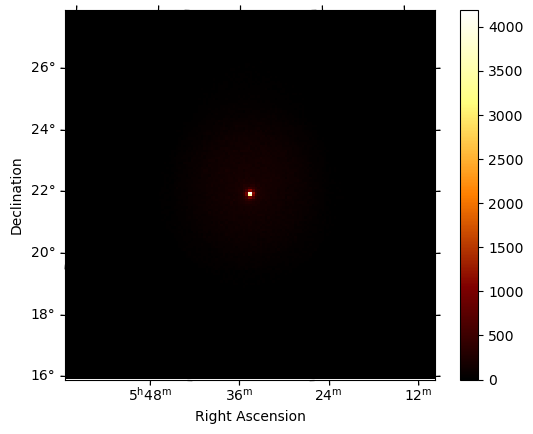

In [16]:
source = 'Crab'
path = '/home/vault/caph/mppi062h/repositories/HESS_3Dbkg_syserror/2-error_in_dataset'
path_crab = '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/nuisance_summary/Crab'


dataset_load = MapDataset.read(f'{path}/{source}/stacked.fits')
dataset_load = dataset_load.downsample(4)
models = Models.read(f"{path_crab}/standard_model.yml")
model_spectrum  = PowerLawSpectralModel(
    index=2.3,
    amplitude="1e-12 TeV-1 cm-2 s-1",    )
source_model = SkyModel(spatial_model = models['main source'].spatial_model ,
                       spectral_model = model_spectrum,
                       name = "Source")    
models = Models(source_model)

bkg_model = FoVBackgroundModel(dataset_name=dataset_load.name)
bkg_model.parameters['tilt'].frozen  = False
models.append(bkg_model)
dataset_load.models = models

dataset_asimov = dataset_load.copy()
dataset_asimov.counts = dataset_load.npred()
models = Models(source_model.copy())
bkg_model = FoVBackgroundModel(dataset_name=dataset_asimov.name)
bkg_model.parameters['tilt'].frozen  = False
models.append(bkg_model)
dataset_asimov.models = models

    
dataset_load.counts.sum_over_axes().plot(add_cbar=1)
binsize = dataset_load.geoms["geom"].width[1] / dataset_load.geoms["geom"].data_shape[1]
print(
    "spatial binsize = ",
    binsize
)

print(dataset_load)

## Single Cases

In [17]:
factors = np.array([0.00])
sigma  =0.1
rnd = False
sys = sys_dataset(dataset_asimov, factors[0], rnd)
dataset_input = sys.create_dataset()


In [18]:

for i, factor in enumerate(factors):
    print(i, factor)
    sys = sys_dataset(dataset_asimov, factor, rnd)
    dataset = sys.create_dataset()
    datasets = Datasets(dataset)
    
    dataset_N = sys.create_dataset_N(sigma)
    penalising_covmatrix = [[sigma,sigma * 0.99], [sigma * 0.99, sigma]]
    penalising_invcovmatrix = np.linalg.inv(penalising_covmatrix)

    dataset_N.penalising_invcovmatrix = penalising_invcovmatrix
    datasets_N = Datasets(dataset_N)

0 0.0
4
4


In [19]:
%%time
for i, factor in enumerate(factors):
    print(i, factor)
    fit = Fit(store_trace=False)
    result = fit.run(datasets)


0 0.0
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []


In [20]:
print(result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 112
	total stat : -753580.09

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [21]:
%%time
for i, factor in enumerate(factors):
    fit_N = Fit(store_trace=False)
    result_N = fit_N.run(datasets_N)


penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 62.42221344889308 [0.35244887 0.        ]
penality 62.42221344889308 [-0.35244887  0.        ]
penality 0.624222134488931 [0.03524489 0.        ]
penality 0.624222134488931 [-0.03524489  0.        ]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 62.42221344889308 [0.         0.35244887]
penality 62.42221344889308 [ 0.         -0.35244887]
penality 0.624222134488931 [0.         0.03524489]
penality 0.624222134488931 [ 0.         -0.03524489]
penality 0.006242

penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 1.1650571103371479 [-4.82319942e-02 -8.23922008e-05]
penality 3.1693325312079432 [-7.94980124e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.0893305505694406 [-0.063865    0.00062191]
penality 1.99993855747373 [-0.063865  -0.0007867]
penality 2.044385285928927 [-6.38650033e-02 -8.23922008e-05]
penality 2.044385285928927 [-6.38650033e

penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.07565662373533195 [ 0.01135003 -0.00092871]
penality 0.18349965403244167 [-0.02002825 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.008522518914253143 [-0.00433911 -0.00022323]
penality 0.0037479406504615943 [-0.00433911 -0.00163419]
penality 0.005885128887326334 [-0.00433911 -0.00092871]
penality 0.005885128887326334 [-0.00433911 -0.000

penality 8.828783213367323e-06 [-0.00086018 -0.00090492]
penality 0.00022130346907465505 [-0.00086018 -0.00019915]
penality 8.828783213367323e-06 [-0.00086018 -0.00090492]
penality 0.00022130346907465505 [-0.00086018 -0.00019915]
penality 8.828783213367323e-06 [-0.00086018 -0.00090492]
penality 0.00022130346907465505 [-0.00086018 -0.00019915]
penality 8.82878321336733e-06 [-0.00086018 -0.00090492]
unique_pars ['index', 'amplitude', 'amplitude_nuisance', 'reference', 'lon_0', 'lat_0', 'sigma', 'e', 'phi', 'norm', 'norm_nuisance', 'tilt', 'reference']
parameters ['index', 'amplitude', 'amplitude_nuisance', 'reference', 'lon_0', 'lat_0', 'sigma', 'e', 'phi', 'norm', 'norm_nuisance', 'tilt', 'reference']
DatasetModels

Component 0: SkyModel

  Name                      : SourceN
  Datasets names            : None
  Spectral model type       : PowerLawNuisanceSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index              

In [22]:
print(result_N)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization failed.
	nfev       : 504
	total stat : -753580.09

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



## Correlation

In [23]:
from gammapy.modeling.fit import Registry
registry= Registry()

def covariance_ (fit_compute, datasets_compute):
    #parameters = Parameters.from_stack([datasets_compute.models.parameters])
    parameters = datasets_compute.models.parameters
    parameters = parameters.free_parameters

    kwargs = fit_compute.covariance_opts.copy()
    kwargs["minuit"] = fit_compute.minuit
    backend = kwargs.pop("backend", fit_compute.backend)
    compute = registry.get("covariance", backend)

    with parameters.restore_status():
        if fit_compute.backend == "minuit":
            method = "hesse"
        else:
            method = ""
        factor_matrix, info = compute(
            parameters=parameters, function=datasets_compute.stat_sum, **kwargs
        )
        covariance = Covariance.from_factor_matrix(
            parameters=parameters, matrix=factor_matrix
        )

        #covariance = covariance.get_subcovariance(datasets_compute.models.parameters)
    return covariance

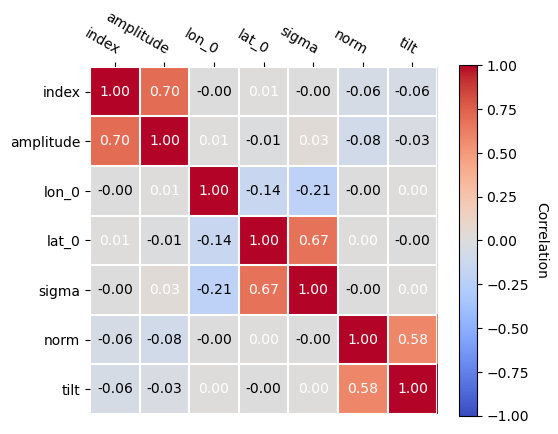

In [24]:
covariance  = covariance_(fit, dataset)
covariance.plot_correlation()


fig = plt.gcf()
fig.savefig("plots/3_corr_matrix.png")

In [25]:
from itertools import combinations
def make_contours(fit, datasets, result, npoints, sigmas):
    cts_sigma = []
    for sigma in sigmas:
        contours = dict()
        for par_1, par_2 in combinations(["sigma", "index", "tilt"], r=2):
            idx1, idx2 = datasets.parameters.index(par_1), datasets.parameters.index(
                par_2
            )
            name1 = datasets.models.parameters_unique_names[idx1]
            name2 = datasets.models.parameters_unique_names[idx2]
            contour = fit.stat_contour(
                datasets=datasets,
                x=datasets.parameters[par_1],
                y=datasets.parameters[par_2],
                numpoints=npoints,
                sigma=sigma,
            )
            contours[f"contour_{par_1}_{par_2}"] = {
                par_1: contour[name1].tolist(),
                par_2: contour[name2].tolist(),
            }
        cts_sigma.append(contours)
    return cts_sigma

In [26]:
sigmas = [1, 2]
cts_sigma = make_contours(
    fit=fit,
    datasets=datasets,
    result=result,
    npoints=10,
    sigmas=sigmas,
)

penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penali

/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: Runt

penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: Runt

penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: Runt

penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)


penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)


penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)


penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)


penality 0 []


/home/hpc/caph/mppi045h/anaconda3/envs/gammapy-2.0-dev/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/hpc/caph/mppi045h/gammapy/gammapy/modeling/models/spatial.py:554: RuntimeWarning: invalid value encountered in multiply
  return u.Quantity(norm * np.exp(exponent).value, "sr-1", copy=False)
Position <SkyCoord (ICRS): (ra, dec) in deg
    (89.62715419, 22.01529333)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (ICRS): (ra, dec) in deg
    (89.62715419, 22.01529333)> is outside valid IRF map range, using nearest IRF defined within


penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []


Position <SkyCoord (ICRS): (ra, dec) in deg
    (77.63825898, 22.01529333)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (ICRS): (ra, dec) in deg
    (77.63825898, 22.01529333)> is outside valid IRF map range, using nearest IRF defined within


penality 0 []
penality 0 []
penality 0 []


Position <SkyCoord (ICRS): (ra, dec) in deg
    (83.63270659, 61.15770994)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (ICRS): (ra, dec) in deg
    (83.63270659, 61.15770994)> is outside valid IRF map range, using nearest IRF defined within


penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
E MnContours unable to find first two points
[]
(0,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
pars = {
    "phi": r"$\phi_0 \,/\,(10^{-11}\,{\rm TeV}^{-1} \, {\rm cm}^{-2} {\rm s}^{-1})$",
    "alpha": r"$\alpha$",
    "beta": r"$\beta$",
}

panels = [
    {
        "x": "alpha",
        "y": "phi",
        "cx": (lambda ct: ct["contour_alpha_amplitude"]["alpha"]),
        "cy": (lambda ct: np.array(1e11) * ct["contour_alpha_amplitude"]["amplitude"]),
    },
    {
        "x": "beta",
        "y": "phi",
        "cx": (lambda ct: ct["contour_beta_amplitude"]["beta"]),
        "cy": (lambda ct: np.array(1e11) * ct["contour_beta_amplitude"]["amplitude"]),
    },
    {
        "x": "alpha",
        "y": "beta",
        "cx": (lambda ct: ct["contour_alpha_beta"]["alpha"]),
        "cy": (lambda ct: ct["contour_alpha_beta"]["beta"]),
    },
]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
colors = ["m", "b", "c"]
for p, ax in zip(panels, axes):
    xlabel = pars[p["x"]]
    ylabel = pars[p["y"]]
    for ks in range(len(cts_sigma)):
        plot_contour_line(
            ax,
            p["cx"](cts_sigma[ks]),
            p["cy"](cts_sigma[ks]),
            lw=2.5,
            color=colors[ks],
            label=f"{sigmas[ks]}" + r"$\sigma$",
        )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
plt.legend()
plt.tight_layout()